Data Preview:


,Calendar Day,Month,CCR Delivery Type,Delivery Number,Equipment Number,Plant,S2 Start Load Time,S6 Start Unload TS,ShipTo Number,Sold-To Number,Delivered Volume (SUM)
0,20250603,6,DE,HLDU25-00001,LHV204,HU3I,95200,0000/00/00 11:00:00,18332139.0,18200651,7.5
1,20250603,6,DE,HLDU25-00002,AEMJ879,HU3I,100700,0000/00/00 10:45:00,18332139.0,18200651,6.0
2,20250603,6,CO,HLDU25-00003,NYW495,HU3I,102151,0000/00/00 10:39:51,18333969.0,18209586,12.0
3,20250603,6,DE,HLDU25-00004,LEN036,HU3I,104300,0000/00/00 11:20:00,18332139.0,18200651,6.0
4,20250603,6,CO,HLDU25-00005,MZP099,HU3I,111500,0000/00/00 11:18:13,18286387.0,18200044,1.5


Total Wasted Capacity: 7003.26 m3
Average Waste per Delivery: 1.92 m3


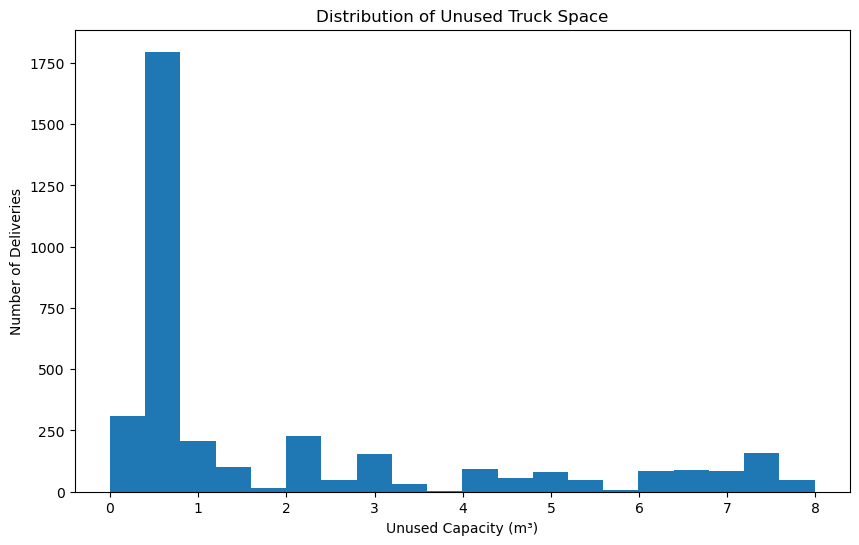


Top 10 Deliveries with Highest Waste:


,Calendar Day,Month,CCR Delivery Type,Delivery Number,Equipment Number,Plant,S2 Start Load Time,S6 Start Unload TS,ShipTo Number,Sold-To Number,Delivered Volume (SUM),Unused_Capacity
1640,20250429,4,CO,SLDU25-01640,AIFP44,HU3I,103400,0000/00/00 10:36:02,18332881.0,18222795,0.01,7.99
2545,20250618,6,DE,SLDU25-02547,RAM413,HU3I,95700,0000/00/00 10:25:00,18331633.0,18200651,0.20,7.80
101,20250121,1,CO,SLDU25-00090,RKA586,HU3I,123318,0000/00/00 12:33:22,18332263.0,18211214,0.20,7.80
2126,20250528,5,CO,SLDU25-02126,MRT879,HU3I,125300,0000/00/00 12:55:42,18333984.0,18211975,0.25,7.75
1063,20250324,3,CO,SLDU25-01058,AEEN064,HU3I,141049,0000/00/00 14:10:59,18249900.0,18249900,0.25,7.75
1233,20250403,4,CO,SLDU25-01232,AEEN064,HU3I,74839,0000/00/00 07:48:41,18249900.0,18249900,0.25,7.75
2521,20250616,6,CO,SLDU25-02523,RKA586,HU3I,150500,0000/00/00 15:08:26,18334337.0,18211214,0.25,7.75
193,20250205,2,CO,SLDU25-00183,AEEN064,HU3I,94439,0000/00/00 09:44:41,18249900.0,18249900,0.25,7.75
110,20250122,1,CO,SLDU25-00100,RKA586,HU3I,113919,0000/00/00 11:41:19,18332263.0,18211214,0.25,7.75
1641,20250429,4,CO,SLDU25-01641,AIFP44,HU3I,103600,0000/00/00 10:37:59,18332881.0,18222795,0.25,7.75


Output saved to truck_space_waste_output.xlsx


In [3]:
# Truck Space Utilization Analysis – Jupyter Notebook Version
# ------------------------------------------------------------
# This notebook analyzes delivery data and calculates wasted truck space
# WITHOUT Streamlit or Dash.
# You can run this directly in Jupyter Notebook.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Load Data
# -----------------------------
file1 = r"C:\Users\vshankar\Downloads\HeidelbergMaterialsGroup_AECOHack_DataPackage\HUN Delivery Data Hackathon_YTD Aug25.xlsx"

file2 = r"C:\Users\vshankar\Downloads\HeidelbergMaterialsGroup_AECOHack_DataPackage\Additional Customer delivery data_HUN_TUM.xlsx"

try:
    df = pd.read_excel(file1)
except:
    df = pd.DataFrame()

# Preview
print("Data Preview:")
display(df.head())

# -----------------------------
# 2. Set Truck Capacity
# -----------------------------
TRUCK_CAPACITY = 8.0  # You can change this

# Calculate unused capacity
if not df.empty:
    df['Unused_Capacity'] = (TRUCK_CAPACITY - df['Delivered Volume (SUM)']).clip(lower=0)

    # Summary
    total_waste = df['Unused_Capacity'].sum()
    avg_waste = df['Unused_Capacity'].mean()

    print(f"Total Wasted Capacity: {total_waste:.2f} m3")
    print(f"Average Waste per Delivery: {avg_waste:.2f} m3")

# -----------------------------
# 3. Plot Waste Distribution
# -----------------------------
if not df.empty:
    plt.figure(figsize=(10,6))
    plt.hist(df['Unused_Capacity'], bins=20)
    plt.title('Distribution of Unused Truck Space')
    plt.xlabel('Unused Capacity (m³)')
    plt.ylabel('Number of Deliveries')
    plt.show()

# -----------------------------
# 4. Show Worst Deliveries
# -----------------------------
if not df.empty:
    worst = df.sort_values('Unused_Capacity', ascending=False).head(10)
    print("\nTop 10 Deliveries with Highest Waste:")
    display(worst)

# -----------------------------
# 5. Optional: Save Results
# -----------------------------
if not df.empty:
    df.to_excel("truck_space_waste_output.xlsx", index=False)
    print("Output saved to truck_space_waste_output.xlsx")
